# Week 2 HW - Graphing variant data
_____________________________________________

## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import io

## Read file and save as DataFrame
I adapted a function from user dceoy on github (see link below) to read in the vcf correctly. In addition the the base function, I added a few lines to split up the items in the FORMAT and INFO columns to make them more accessible later.
   https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744

In [2]:
def read_vcf(path):
    '''
    This function is adapted from user dceoy on github
    https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744
    '''
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    df = pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})
    
    format_head = ['GT', 'GQ', 'DP', 'RO', 'QR', 'AO', 'QA', 'GL']
    numeric_cols = ['POS','QUAL','GT','GQ','DP','RO','QR','AO','QA']
    
    for idx, col in df.loc[:,'Sample09':].iteritems():
        num = idx[-2:]
        head = [s + num for s in format_head]
        df[head] = df[idx].str.split(':', expand=True)
    
    df['INFO'] = df['INFO'].str.split(';',expand=False)

    return df

df = read_vcf('final_all.vcf')
df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,Sample09,...,QA62,GL62,GT63,GQ63,DP63,RO63,QR63,AO63,QA63,GL63
0,chrI,980,.,A,G,31.6393,.,"[AB=0, ABP=0, AC=3, AF=0.3, AN=10, AO=19, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"0:160.002:12:10:333:2:62:0,-30.0757",...,119,"0,-31.8859",0,160.002,15,15,449,0,0,"0,-39.9293"
1,chrI,981,.,A,C,31.6393,.,"[AB=0, ABP=0, AC=3, AF=0.3, AN=10, AO=19, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"0:160.002:12:10:333:2:62:0,-30.0757",...,119,"0,-31.8859",0,160.002,15,15,449,0,0,"0,-39.9293"
2,chrI,1101,.,G,A,897.542,.,"[AB=0, ABP=0, AC=8, AF=0.8, AN=10, AO=125, CIG...",GT:GQ:DP:RO:QR:AO:QA:GL,"1:51.3726:28:14:412:14:493:-2.01994,0",...,622,"0,-3.58389",1,131.64,26,9,229,17,464,"-15.1895,0"
3,chrI,1164,.,T,C,116.132,.,"[AB=0, ABP=0, AC=7, AF=0.7, AN=10, AO=21, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"1:28.0523:4:1:28:3:90:-4.70045,0",...,80,"0,-1.30144",1,12.31,5,2,64,3,44,"-2.31062,0"
4,chrI,1334,.,C,T,30.546,.,"[AB=0, ABP=0, AC=3, AF=0.3, AN=10, AO=62, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"0:82.1098:15:5:151:10:357:0,-6.36529",...,364,"0,-15.4305",0,134.074,8,7,214,1,34,"0,-17.3705"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42583,chrXVI,942589,.,G,A,243.316,.,"[AB=0, ABP=0, AC=3, AF=0.3, AN=10, AO=90, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"0:54.4058:10:5:160:5:140:0,-4.34521",...,465,"-26.0099,0",0,160.002,44,31,942,13,331,"0,-61.9586"
42584,chrXVI,942644,.,C,T,596.723,.,"[AB=0, ABP=0, AC=3, AF=0.3, AN=10, AO=154, CIG...",GT:GQ:DP:RO:QR:AO:QA:GL,"0:160.002:26:23:572:1:27:0,-42.7502",...,802,"-62.6355,0",0,160.002,96,59,1370,36,989,"0,-49.1019"
42585,chrXVI,942720,.,T,C,129.067,.,"[AB=0, ABP=0, AC=1, AF=0.1, AN=10, AO=14, CIGA...",GT:GQ:DP:RO:QR:AO:QA:GL,"1:126.757:2:1:35:1:35:0,0",...,37,"0,-1.08297",0,7.03495e-13,14,12,353,2,65,"0,-6.14394"
42586,chrXVI,942826,.,C,G,600.691,.,"[AB=0, ABP=0, AC=7, AF=0.777778, AN=9, AO=60, ...",GT:GQ:DP:RO:QR:AO:QA:GL,.:.:.:.:.:.:.:.,...,196,"-15.2918,0",1,160.002,28,12,226,14,333,"-15.6578,0"


## Get data for graphs
Using specialized functions to retrieve the data, we get all the information we need.

In [3]:
def get_format(df, target, dtype=float):
    samples = ['09','11','23','24','27','31','35','39','62','63']
    target_cols = [target + n for n in samples]
    
    target_format = df[target_cols[0]]
    for col in target_cols[1:]:
        target_format.append(df[col], ignore_index=True)
    
    target_format = target_format[target_format != '.']
    target_format = target_format.str.split(',',expand=True)[0]
    return target_format.astype(dtype)

dp = get_format(df, 'DP', int)
gq = get_format(df, 'GQ')

print(dp)
print(gq)

0        12
1        12
2        28
3         4
4        15
         ..
42581     8
42582     9
42583    10
42584    26
42585     2
Name: 0, Length: 40793, dtype: int64
0        160.0020
1        160.0020
2         51.3726
3         28.0523
4         82.1098
           ...   
42581     64.2612
42582     71.7423
42583     54.4058
42584    160.0020
42585    126.7570
Name: 0, Length: 40793, dtype: float64


In [4]:
def expand_info(df):
    df_info = df.loc[:, 'INFO']
    df_info = df_info.apply(pd.Series)
    return df_info

def get_info(df_exp, target, dtype=object):
    for idx, col in df_exp.iteritems():
        if col[0].startswith(target):
            coi = idx
            break
    
    target_info = df_exp.loc[:,idx]
    target_info = target_info.str.split('=',expand=True)
    target_info = target_info.loc[:,1]
    
    if dtype == float:
        target_info = target_info.str.split(',',expand=True)
        to_append = target_info.loc[:, 1]
        to_append = to_append.dropna()
        target_info = target_info.loc[:, 0].append(to_append)
    
    return target_info.astype(dtype)
        

expanded_info = expand_info(df)
af = get_info(expanded_info, 'AF', dtype=float)
af

0        0.300000
1        0.300000
2        0.800000
3        0.700000
4        0.300000
           ...   
40496    0.111111
40705    0.300000
41736    0.375000
42115    0.333333
42331    0.285714
Length: 42667, dtype: float64

I opted to retrieve all the effects listed for each variant, including splitting each individual annotation with multiple effects (effect1&effect2&effect3) into its component effects and adding all.

In [5]:
def ann_parser(df_exp):
    ser_ann = get_info(df_exp, 'ANN')
    effects = dict()
    for row in ser_ann:
        anns = row.split(',')
        for ann in anns:
            eff = ann.split('|')[1]
            for split_eff in eff.split('&'):
                if split_eff in effects:
                    effects[split_eff] += 1
                else:
                    effects[split_eff] = 1
    
    return(effects)

effects = ann_parser(expanded_info)
print(effects.keys())

dict_keys(['upstream_gene_variant', 'downstream_gene_variant', 'intergenic_region', 'synonymous_variant', 'missense_variant', 'stop_gained', 'intron_variant', 'non_coding_transcript_exon_variant', 'splice_region_variant', 'stop_lost', 'frameshift_variant', 'disruptive_inframe_deletion', 'disruptive_inframe_insertion', 'conservative_inframe_insertion', 'stop_retained_variant', 'initiator_codon_variant', 'start_lost', 'conservative_inframe_deletion', '', 'splice_donor_variant'])


## Make graphs

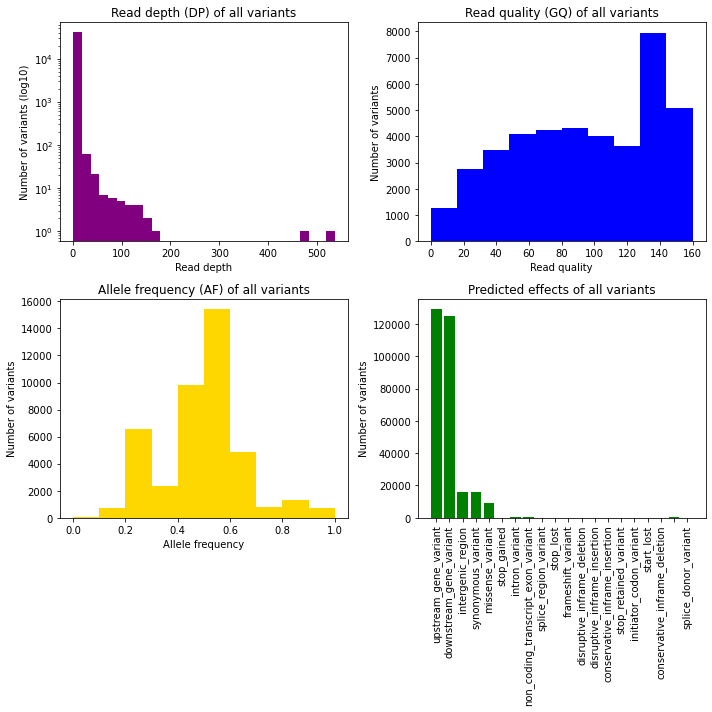

In [6]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.hist(dp, bins=30, color='purple')
ax1.set_yscale('log')
ax1.set_title('Read depth (DP) of all variants')
ax1.set_xlabel('Read depth')
ax1.set_ylabel('Number of variants (log10)')

ax2.hist(gq, color='blue')
ax2.set_title('Read quality (GQ) of all variants')
ax2.set_xlabel('Read quality')
ax2.set_ylabel('Number of variants')

ax3.hist(af, color='gold')
ax3.set_title('Allele frequency (AF) of all variants')
ax3.set_xlabel('Allele frequency')
ax3.set_ylabel('Number of variants')


ax4.bar(effects.keys(), effects.values(), color='green')
ax4.set_title('Predicted effects of all variants')
ax4.set_ylabel('Number of variants')
ax4.tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.savefig('graphs.jpg')
plt.show()